# **PRAKTIKUM 1**

**Klasifikasi SVM dg Data Dummy**

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt #buat visualisasi grafik,plot
from scipy import stats #buat statistik
import seaborn as sns #visualisasi lebih menarik dan informatif

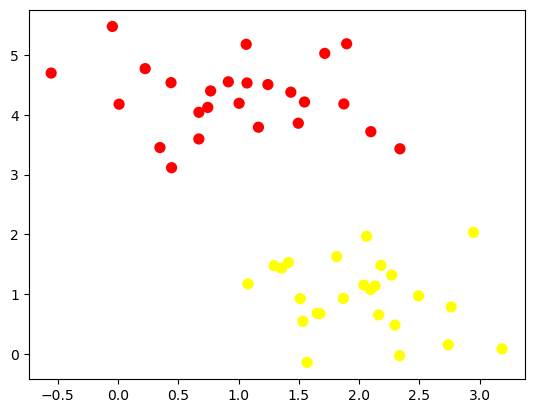

In [3]:
from sklearn.datasets import make_blobs #buat dataset buatan 
X, y = make_blobs(n_samples=50, centers=2, #buat sampel
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Hasil kode diatas adalah scatter plot yg punya 2 cluster beda(kuning,merah)

make_blobs ini untuk buat dataset buatan, 
sample/data yg dibuat 50 sampel, center = cluster yg dibuat 2
random_state untuk seed yg konsisten
cluster_std untuk mengontrol data yg tersebar tiap cluster
cmap='autumn' mengatur palet warna

(-1.0, 3.5)

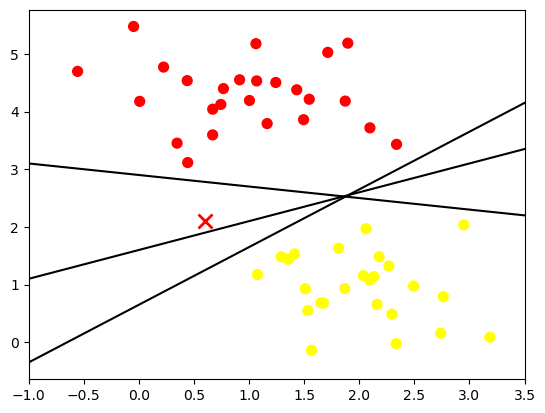

In [4]:
xfit = np.linspace(-1, 3.5) #array garis lurus
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]: #for 3 garis lurus
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

Output Scatter plot dua cluster dengan garis pemisah.
ada tiga garis lurus berbeda yang memisahkan 2 cluster berdasarkan kemiringan dan intercept yang ditentukan.
- array xfit ini berisi -1 sampai 3,5 untuk buat garis lurus pemisah cluster
- plt.scatter yg nampilin 2 cluster berbeda itu
- tanda X merah pada kordinat 0.6 , 2.1
- loop for untuk menggambar tiga garis lurus berbeda. Yg iterasinya mengambil nilai kemiringan (m) dan intercept (b) dari pasangan nilai yang diberikan dalam tuple

(-1.0, 3.5)

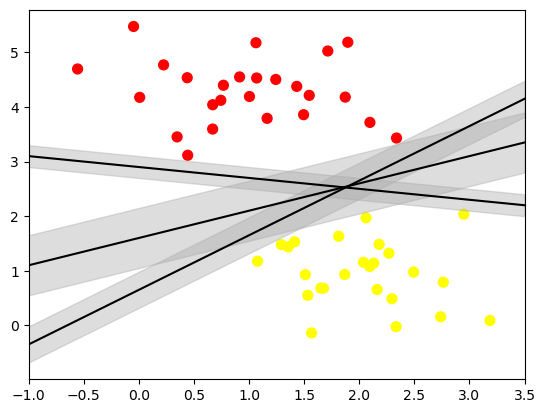

In [5]:
xfit = np.linspace(-1, 3.5) #array xfit -1 sampai 3,5
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

Hasil outputnya kode diatas sama hanya saja terdpat shading(bayangan) di garis pemisah

Margin yang digunakan pada SVM berfungsi untuk menunjukkan model yang paling optimal. Kriteria optimal ini diperoleh dari penentuan garis mana yang mampu memaksimalkan margin yang ada.


Penerapan Fitting SVM

In [11]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10) # membuat instance dari model SVC
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Model ini akan mencoba untuk mencari garis pemisah yang optimal antara dua cluster dalam ruang fitur.
 
- SVC digunakan untuk membuat model SVM.
- kernel='linear, ngatur jenis kernel
- model.fit(x,y), langkah model akan mempelajari pemisahan antara dua cluster dalam dataset.

In [13]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

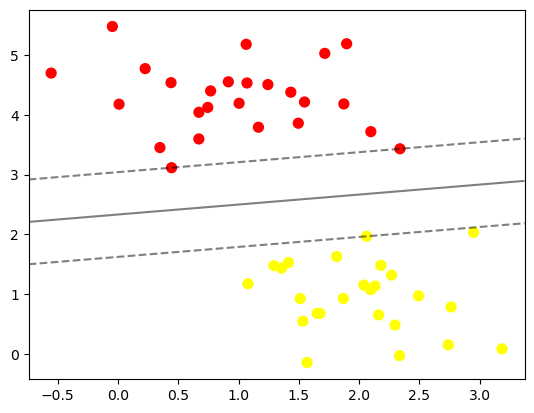

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

Kode ini membantu dalam memvisualisasikan pemisahan data dan margin dari model SVM
- ax=None, sumbu (axis) yang akan digunakan untuk membuat plot
- plot_support=True,mengontrol tampilan support vectors
- ax.contour, menggambar garis pemisahan (contour) 
  dari model SVM
- if plot_support: menampilkan titik-titik (support vectors)(jika plot_support adalah True).

fungsi plot_svc_decision_function:
berguna untuk memvisualisasikan hasil pemisahan data dari model SVM 
dan juga untuk melihat margin serta titik-titik support vectors

*beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector.

In [16]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector).

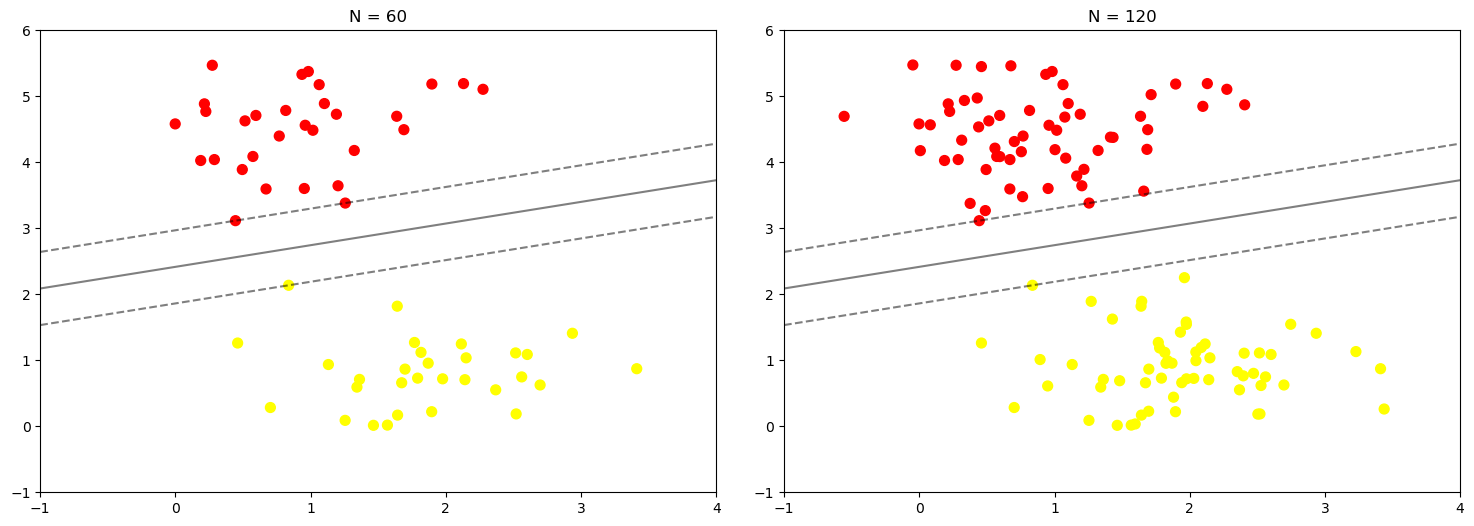

In [17]:
def plot_svm(N=10, ax=None): 
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Hasilnya adalah dua subplot yang menunjukkan pemisahan data menggunakan model SVM dengan jumlah sampel yang berbeda
- N=10: Ini adalah jumlah sampel yang akan digunakan dalam data yang dibuat secara acak.
a- ax=None: Ini adalah sumbu (axis) yang akan digunakan untuk membuat plot.
- X = X[:N] dan y = y[:N], untuk memotong dataset menjadi N


**Data Tidak Terpisah Secara Linier**

Kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan nonlinier dengan sebuah classifier linier.

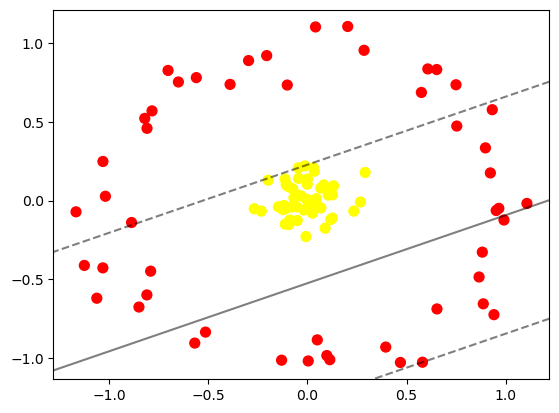

In [23]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles #membuat dataset buatan yang berbentuk cincin.
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') #memplot dataset
plot_svc_decision_function(clf, plot_support=False);

Diatas adalah data yang tidak dapat dipisahkan dengan sebuah garis lurus.
Namun dg menggunakan model Support Vector Machine (SVM) dengan kernel linear  mencoba memisahkan data tersebut.
- (100, factor=.1, noise=.1) => 
100 sampel , Faktor yg mengontrol jarak antar 2 cicin, tingkat kebisingan. Semakin besar nilai noise, smkin bnyak kebisingan dlm data
- plot_support diatur ke False, yang berarti tidak akan menampilkan support vectors
Output: scatter plot yang menampilkan data cincin yang tidak dapat dipisahkan secara linear, serta garis pemisah yang dihasilkan oleh model SVM dengan kernel linear. 
*menggambarkan bahwa SVM dengan kernel linear tidak cocok untuk jenis data seperti ini*

Berdasarkan contoh data di atas, 
Proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas => proyeksi yang digunakan adalah proyeksi berbasis radial.

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

In [30]:
r = np.exp(-(X ** 2).sum(1))
#operasi yang dapat digunakan untuk menghitung sejenis nilai yang bergantung pada jarak atau kepadatan data dalam dataset X
from mpl_toolkits import mplot3d  #impor modul buat 3D
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d') #membuat subplot 3D
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim) #mengatur elevasi dan azimut
    ax.set_xlabel('x')
    ax.set_ylabel('y')  #mengatur label sumbu x, y, dan z 
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180), #untuk membuat antarmuka interaktif.
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 3.09466285e-02,  2.07733352e-01],
       [-1.27240441e-02,  2.19962160e-01],
       [ 8.86955146e-01, -6.55973876e-01],
       [ 1.32069611e-01,  9.27038734e-02],
       [-7.01964426e-01,  8.25804332e-01],
       [ 9.32209856e-01,  5.76539814e-01],
       [ 9.22677092e-01,  1.75127111e-01],
       [ 9.65414596e-01, -4.99373205e-02],
       [ 2.34313672e-01, -6.77316278e-02],
       [ 3.56305583e-02,  1.86103821e-01],
       [-8.19297547e-01,  5.21270388e-01],
       [ 1.10699959e+00, -1.87521211e-02],
       [ 9.91287762e-01, -1.23891754e-01],
       [ 7.49528037e-01,  7.34799807e-01],
       [ 5.75034147e-01,  6.85940308e-01],
       [ 5.02495332e-02, -8.84753260e-01],
       [-1.77994793e-02, -6.06315375e-02],
       [-4.42840655e-02,  1.40389416e-01],
       [ 9.40784529e-01, -7.24754186e-01],
       [ 2.67842283e-01, -9.25144039e-03],
       [-7.82896425e-04,  6.22374564e-03],
       [ 6.80439623e-02, -4.71912719e-02],
       

Hasilnya adalah plot 3D yang memungkinkan mengubah elevasi dan azimut tampilan dengan menggunakan slider interaktif, sehingg dapat meriksa bagaimana data dalam dataset X berkaitan dengan tiga dimensi x, y, dan r.
- elev=30:  elevasi (ketinggian) dari tampilan plot 3D. 
            Nilai bisa diubah
- azim=30:  azimut (sudut pandang horizontal) dari tampilan plot 3D. 
            Nilai ini bisa diubah.
- X=X, y=y: Ini adalah dataset X dan label y yang akan digunakan dalam plot

In [32]:
clf = SVC(kernel='rbf', C=1E6) #membuat instance dari model Support Vector Machine (SVM) dengan menggunakan kernel RBF
clf.fit(X, y)

SVC(C=1000000.0)

beberapa penjelasan singkat kode
- kernel='rbf': Mengatur jenis kernel, dalam hal ini kernel RBF.
- Parameter C => parameter penalti yg mengontrol tingkat toleransi kesalahan dalam pemisahan data,

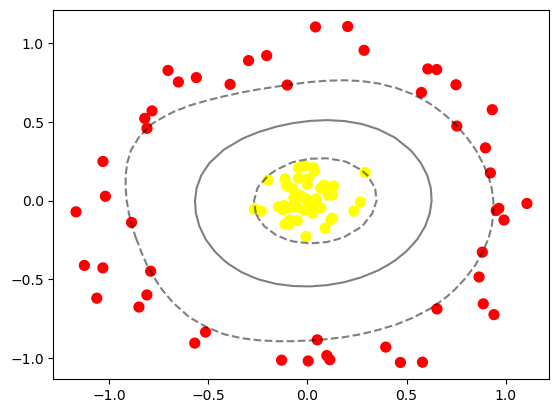

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') 
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

visualisasi data, ada titik support vectors yang mempengaruhi margin pemisahan
dengan ini membantu kita melihat bagaimana model SVM dengan kernel RBF memisahkan data yang lebih kompleks dan titik-titik yang mendukung margin pemisahan.

**Data Overlap**

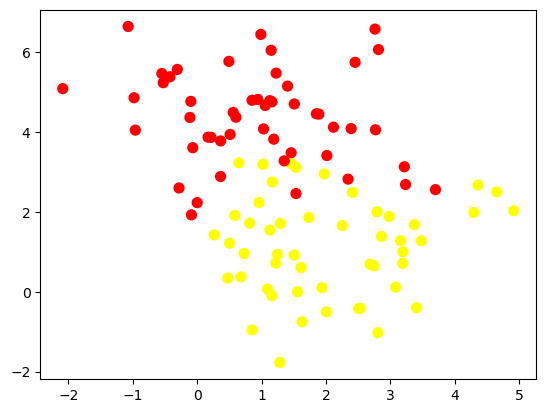

In [34]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Output diatas titik data masuk ke dalam margin supaya  fitting nya lebih baik. 
ini sebuah teknik penghalusan margin di SVM yg dapat diterapkan.

Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C)

Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

Perlu diperhatikan bahwa nila optimal sebuah C bergantung pada setiap dataset (melalui cross-validation atau prosedur serupa)

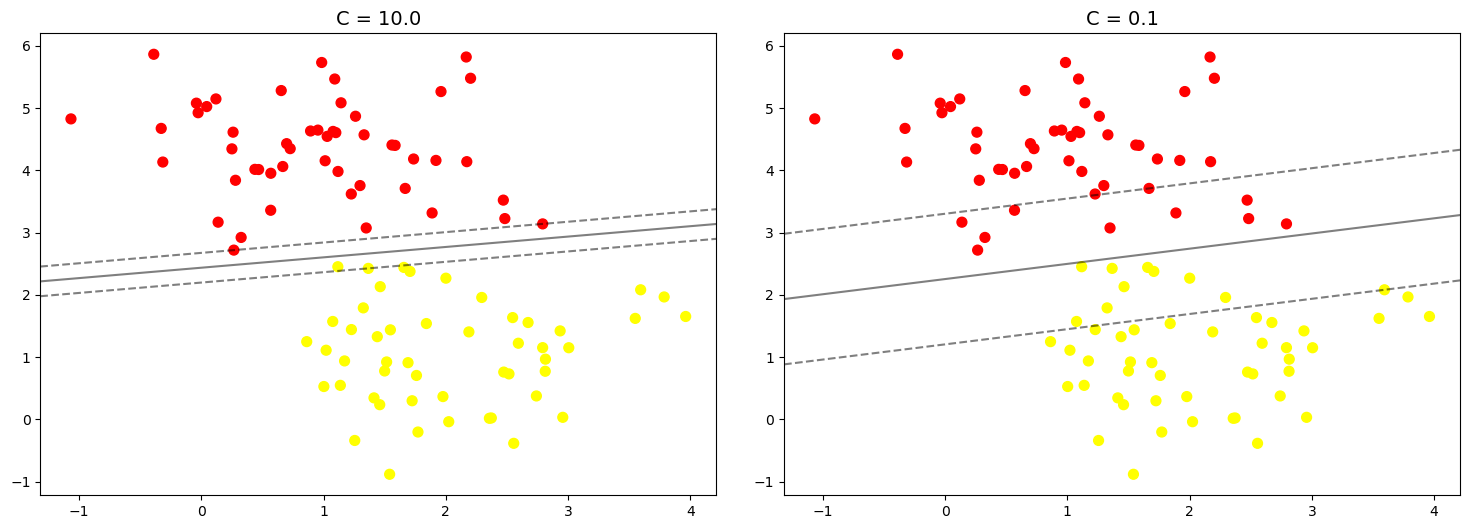

In [35]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1) 
#mngatur penyesuaian tampilan subplot dalam gambar

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Outputnya: dua subplot yang menunjukkan pemisahan data oleh model SVM dengan kernel linear, di mana perbedaan dalam nilai C menghasilkan margin pemisahan yang berbeda.
Jadi, Misal nilai C besar maka margin lebih ketat
      Misal nilai Ckecil maka margin lebih lebar.
 parameter C dapat memengaruhi kompleksitas model SVM dan margin pemisahan.
  
- fig, ax = plt.subplots(1, 2, figsize=(16, 6))
membuat sebuah (figure) yang terdiri dari dua subplot (subplot 1, 2) dg ukuran gambar (figsize) 16x6.
- for axi, C in zip(ax, [10.0, 0.1]):
Loop yang digunakan untuk mengiterasi melalui dua subplot dan dua nilai C yang berbeda (10.0 dan 0.1)